In [1]:
import h5py
import numpy as np
import math
import scipy
from scipy import signal
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline as spline
from scipy.fftpack import fft, fftshift ,ifft,rfft,fftfreq,rfftfreq
c=2.9979e10
G=6.67408e-8
Msun=1.989e33
Length = G*Msun/c**2
Time = Length/c
Frequency=1/Time

In [2]:
EOS=['15H','125H','H','HB','B']
MASS=['135_135','125_146','125_125','121_151','118_155','117_156','116_158','112_140','107_146']
eq=['135_135','125_125']

In [3]:
x=np.arange(0,18,1)
def y1(x):
    return (60/289)*x-(1888/1445)
def y2(x):
    return (42/355)*x-(1259/3550)

In [4]:
m_r1=np.load('tid_def/15H.npy')
m_r2=np.load('tid_def/125H.npy')
m_r3=np.load('tid_def/H.npy')
m_r4=np.load('tid_def/HB.npy')
m_r5=np.load('tid_def/B.npy')

In [5]:
mx=np.amax(m_r1[0])
idx=np.where(m_r1[0]==mx)
idx=idx[0][0]
#cs1=spline(m_r1[0][1:idx],k_l1[0][1:idx])
cs11=spline(m_r1[0][1:idx],m_r1[1][1:idx])

mx=np.amax(m_r2[0])
idx=np.where(m_r2[0]==mx)
idx=idx[0][0]
#cs2=spline(m_r2[0][1:idx],k_l2[0][1:idx])
cs21=spline(m_r2[0][1:idx],m_r2[1][1:idx])

mx=np.amax(m_r3[0])
idx=np.where(m_r3[0]==mx)
idx=idx[0][0]
#cs3=spline(m_r3[0][1:idx],k_l3[0][1:idx])
cs31=spline(m_r3[0][1:idx],m_r3[1][1:idx])

mx=np.amax(m_r4[0])
idx=np.where(m_r4[0]==mx)
idx=idx[0][0]
#cs4=spline(m_r4[0][1:idx],k_l4[0][1:idx])
cs41=spline(m_r4[0][1:idx],m_r4[1][1:idx])

mx=np.amax(m_r5[0])
idx=np.where(m_r5[0]==mx)
idx=idx[0][0]
#cs5=spline(m_r5[0][1:idx],k_l5[0][1:idx])
cs51=spline(m_r5[0][1:idx],m_r5[1][1:idx])



In [6]:
r=np.zeros(len(EOS)*len(MASS))
m=np.zeros(len(r))
typ=np.zeros(len(r))
i=0
for eos in EOS:
    for mas in MASS:
        mastot=float(mas.split('_')[0])/100+float(mas.split('_')[1])/100
        m[i]=mastot/2
        if eos=='15H':
            r[i]=cs11(mastot/2)*Length/1.0e5
        elif eos=='125H':
            r[i]=cs21(mastot/2)*Length/1.0e5
        elif eos=='H':
            r[i]=cs31(mastot/2)*Length/1.0e5
        elif eos=='HB':
            r[i]=cs41(mastot/2)*Length/1.0e5
        elif eos=='B':
            r[i]=cs51(mastot/2)*Length/1.0e5
        
        if mastot/2>y1(r[i]):
            typ[i]=1
        elif mastot/2>y2(r[i]):
            typ[i]=2
        else:
            typ[i]=3
        i=i+1

(1, 2.1)

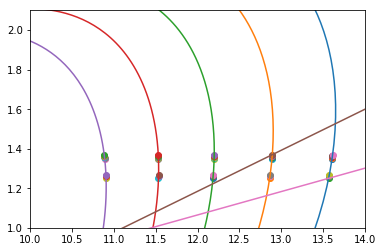

In [7]:
plt.plot(m_r1[1]*Length/1.0e5,m_r1[0])
plt.plot(m_r2[1]*Length/1.0e5,m_r2[0])
plt.plot(m_r3[1]*Length/1.0e5,m_r3[0])
plt.plot(m_r4[1]*Length/1.0e5,m_r4[0])
plt.plot(m_r5[1]*Length/1.0e5,m_r5[0])
for i in range(len(r)):
    plt.scatter(r[i],m[i])
plt.plot(x,y1(x))
plt.plot(x,y2(x))
plt.xlim(10,14)
plt.ylim(1,2.1)

In [8]:
ml=1.5584694852222305
print(cs11(ml)*Length/1.0e5)
print(cs21(ml)*Length/1.0e5)
print(cs31(ml)*Length/1.0e5)
print(cs41(ml)*Length/1.0e5)
print(cs51(ml)*Length/1.0e5)

13.648577824174497
12.899675698067206
12.17495547834392
11.471600457630327
10.784966388281015
